# 1 Introduction

District heating systems (DHS) today require increasingly sophisticated models to accommodate variable demand, ensure occupant comfort, and optimize energy efficiency. With steep advances in design of micro-controllers and communication protocols, the vision of DHS as a cyber-physical system becomes a reality.

However, in legacy systems, even though the supply side automated or semi-automated, the full deployment of high-resolution sensors for indoor thermal comfort is often economically or technically infeasible. In such context, data-driven surrogate modeling offers a promising alternative, enabling control over complex systems based on partial observability and historical behavior.

In DHS, surrogate modeling refers to the construction of simplified, data-driven models that approximate the thermal and hydraulic behavior of the system without relying on fully detailed physical simulations or extensive instrumentation. These surrogate models serve as, in the best case, computationally efficient alternatives to physics-based approaches, enabling system-level analysis and control even in the presence of limited or partially observable data.

DHS typically involve complex spatiotemporal dynamics due to heat transport delays, nonlinear responses to control inputs (for example, supply temperature or flow rate adjustments), and strong dependence on external environmental conditions such as outdoor temperature, solar radiation, wind speed and other meteorological parameters. While supervisory control and data acquisition (SCADA) systems provide high-frequency measurements of supply-side parameters (flow rates, transmitted heat, etc.), feedback from the consumption side, particularly indoor thermal comfort is often unavailable or sparsely sampled due to cost or privacy constraints. Surrogate models bridge this observability gap by learning the statistical and temporal relationships between available inputs, such as control variables and weather conditions, and target outputs (namely, heat demand, indoor temperature) from historical operational data. By doing so, they allow for real-time prediction of system behavior and facilitate control design strategies that aim to balance energy efficiency and occupant comfort. These models can take various forms, ranging from black-box approaches such as neural networks and ensemble methods, to grey-box and hybrid models that combine physical insights with data-driven components. In practical applications, surrogate models have been employed to forecast short-term heat demand, emulate the response of end-use thermal zones, and support optimization-based control by offering quick but reliable approximations of system dynamics. Besides enabling the predictive analytics, surrogate models can also facilitate scalable deployment across large or heterogeneous building blocks, where modeling each consumer individually is infeasible.

In this paper, we propose a two-stage surrogate modeling strategy that separates the modeling of supply-side behavior from the modeling of consumption-side impact. This approach is effective when data availability is asymmetric, namely, where SCADA data from the energy system is available (most common case, less expensive acquisition), but indoor sensor data is sparse or limited to pilot areas or time intervals (due to expensive and intrusive infrastructure needed).

In the first stage, a Machine Learning (ML) model is trained to predict a system-level operational variable (namely, transmitted heat) based on historical control settings, environmental variables, and temporal features. In the second stage, another ML model learns the response of user-centric variable (specifically, indoor temperature) on the transmitted heat and then, it can be applied to predict the indoor temperature, by using the outputs of the first-stage model and available control variables. The result is a surrogate pipeline that can emulate the full system dynamics, even in the absence of direct feedback from end users.

The surrogate models can be embedded into control loops to guide decision-making. For example, surrogate-informed control can be used to adjust secondary supply temperature (t_sup_sec) to maintain indoor comfort, or to simulate the effect of control actions before deployment, enabling virtual commissioning. The most common use case of surrogate-informed control is in Model Predictive Control (MPC), where the surrogate model acts as an internal model to simulate the system's future behavior under various control inputs. The optimization objective in that case is typically formulated as minimization of the energy use, cost, or temperature deviation over a prediction horizon (Killian & Kozek, 2016).

The surrogate modeling approach is particularly appealing in retrofitted DHS environments, where indoor temperature sensors are not uniformly deployed. A model trained on pilot buildings with temperature data can generalize the learned relationships to other buildings using the shared inputs, namely transmitted energy, supply/return temperatures and external weather.

The use of surrogate models also enables decentralized or digital twin-based control architectures, in which each building or substation is treated as a virtual entity whose state is simulated based on forecasted and optimized parameters. This approach supports scalable rollout of intelligent control strategies without extensive hardware retrofitting.

In this paper, we extend earlier reported efforts in building the effective supply-side model, for sequence forecasting of the transmitted energy in DHS (Zdravković et al, 2025) with the conceptualization of innovative two-stage surrogate modelling approach for advanced control strategies of DHS and we demonstrate the use of this approach in local DHS, with showcasing the approach to facilitate the decision making in strategizing its daily operation. Our hypotheses are three-fold:
H1. Modern time series forecasting can be effectively used to forecast 24-hours horizon heat demand, at the level of DHS substation.
H2. ML regression algorithms can be used to accurately predict room temperatures (thermal comfort of occupants) based on available control and weather forecast data.
H3. Two-stage surrogate modelling approach can be practically implemented in facilitating efficient daily operation of DHS, as an alternative to complex physics-based models or expensive retrofitting.

This paper is structured as it follows. In section 2, a background research related to data-driven modeling in DHS and surrogate modeling and control is presented. Section 3 describes the methodology of research work behind this paper. Section 4 demonstrates and interpret the results and introduces discussion on how they can be mainstreamed to practical tools. Section 5 presents conclusions and identifies future work in this area.



# 2 Background research

As mentioned above, there is a clear disparity between the availability of operational SCADA data and limited end-user sensing in DHS landscape. This creates a clear need for methods that can infer latent user conditions from observed or partially observed system dynamics. The research work behind this paper is strongly motivated by this disparity, as we work with the local DHS where supply data (enabling heat demand forecasting) was available for past 5 years, while the consumer data (enabling thermal comfort prediction) only for 1 heating season.

The recent studies have shown that integrating heat demand forecasting with temperature surrogate models can reduce energy use while maintaining comfort even across heterogeneous building stocks (Bland et al., 2023).

## 2.1 Data-Driven Modeling in District Heating Systems

DHS have increasingly become focus of data-driven modeling efforts due to their complex operation under variable demand and the need to efficiently ensure occupant comfort. Traditional DHS control is often reactive, with operators adjusting supply based on current weather or demand data. Modern approaches seek to make DHS control more proactive by leveraging predictive models. For example, Zdravković et al. (2022) propose an AI-assisted control scheme that uses deep learning-based multivariate time-series forecasting to predict heat demand, enabling the system to act in advance of changes rather than reacting in real-time. Accurate forecasting allows the central plant to optimize production and reduce costs and emissions. Lumbreras et al. (2021) developed a data-driven model to predict building heating demand in a district network using historical smart meter data (hourly consumption from 42 buildings) together with weather features (outdoor temperature, solar radiation, wind) and time-of-week factors. Their model employed a combination of supervised clustering to recognize typical consumption patterns and multiple linear regression for prediction. Despite the diversity of building types, this generalized approach achieved high accuracy (R² up to 0.95 on hourly heat load predictions) across most buildings.

The problem of heat demand forecasting has been addressed using a variety of approaches, ranging from statistical methods such as ARIMA and Exponential Smoothing to traditional Machine Learning algorithms and advanced, novel Deep Learning techniques. The literature review on heat demand forecasting carried out for the purpose of this research has considered the most cited journal papers published in last 5 years (since 2019). It was found that the use of the Deep Learning approach is overwhelming. The choice of approaches starts with multi-layer Artificial Neural Networks (ANN) (Kurek et al, 2021). Long-Short Term Memory (LSTM) networks in its original (Zdravković et al, 2022) or other forms, such as bidirectional LSTMs (Cui, 2023) or those combined with convolutional layers for temporal pattern recognition CNN-LSTM (Yao et al, 2022) are considered as the most performant approach. In CNN-LSTM topology, 1D convolutional layers are used to extract local patterns and features like trends, seasonality, and local variations in the time series data. The LSTM layers are then used to capture the temporal dependencies and sequential patterns in the data.

A major challenge in DHS modeling is capturing the long-lasting thermal dynamics of the network without incurring prohibitive computational cost, normally introduced by simulation. Kudela et al. (2020) addressed this by combining physical insight with ML to build surrogate models for DHS components. In their work, a simple steady-state physical model (for example, of heat loss in a buried pipe) is automatically extended with dynamics learned from a detailed simulation, yielding a hybrid surrogate. Such surrogate models make it feasible to simulate and optimize district heating behavior in real time, which is essential for advanced control strategies.



## 2.2 Surrogate modeling and control in building energy systems

Beyond the district-level supply, surrogate modeling approach is also making an impact on the consumption side, namely, heating, ventilation, and air-conditioning (HVAC) control within buildings. Surrogate models are simplified representations of complex building thermal behavior, trained on data, that can emulate detailed simulations or real building responses at a fraction of the computational cost (Shakhovska et al, 2025).

These models have become useful assets in building energy management, where real-time decision-making is required for smart thermostats, predictive controllers, and anomaly detection systems. By capturing the input-output relationships of a building's thermal dynamics, data-driven surrogates allow control algorithms to estimate indoor conditions and energy use without a need for exhaustive sensor coverage or high-fidelity physics models in every zone.

One of the applications is indoor temperature forecasting. Accurate data-driven predictions of indoor climate enable controllers to anticipate discomfort and adjust heating/cooling proactively, even in the absence of full sensor feedback. In fact, improving indoor air temperature prediction directly translates to better energy efficiency and comfort. By forecasting how indoor environments respond, HVAC systems can avoid over-conditioning spaces, thus saving energy while keeping occupants within comfort thresholds.

ML models have been used as surrogates to predict indoor temperature responses based on available data. For instance, Elmaz et al. (2021) trained a hybrid CNN-LSTM model to predict future indoor temperatures, capturing both spatial features and time-series patterns of a building's thermal behavior. Similarly, Mtibaa et al. (2020) demonstrated that LSTM-based models can accurately forecast indoor air temperature for HVAC systems, which is useful for model-predictive control in smart buildings. Such surrogate models can rapidly evaluate many building design or retrofit options that would be infeasible to simulate one-by-one with traditional building physics software.

Another research direction in this field is using surrogates within optimal control frameworks. Since surrogate models are fast and differentiable, they can be embedded into optimization-based controllers like Model Predictive Control (MPC). Mostafavi et al. (2024) presented a data-driven HVAC control framework where a surrogate model of the building, trained offline on a physics-based emulator, is used inside an MPC loop. The surrogate provides quick predictions and gradients, allowing the MPC to optimize heating/cooling setpoints over a prediction horizon while respecting constraints. This approach drastically reduces the computational burden of MPC, which historically has been a barrier to its adoption in buildings.

To summarize, there is a clearly increasing trend of developing data-driven surrogate modeling applications in both district heating and building-level HVAC control. In district heating networks, ML models are used to forecast demand and system behavior on the supply side, enabling more efficient and low-carbon operations. In individual buildings, surrogate models empower controllers to predict and optimize indoor climate outcomes using available data, effectively emulating the sensors or detailed simulations. These advances illustrate that separating the supply-side and demand-side modeling (as in a two-stage approach) is a promising strategy: a first-stage model can capture the heating system's output under various controls and conditions, while a second-stage model uses that output to predict occupant-centric variables. In this paper, an approach to this cascaded surrogate modeling has been demonstrated.

# 3 Methodology

This section presents a novel, data-driven methodology for modeling and controlling heat delivery in DHS in the absence of full feedback from end-user thermal comfort measurements. The proposed framework builds upon established approaches for time series forecasting in DHS (Zdravkovic et al., 2025), and introduces a two-stage surrogate modeling pipeline that enables optimization of control parameters, specifically the primary and secondary supply water temperature, which are normally determined semi-automatically, based on control curves' setpoints.

The key innovation of the proposed methodology lies in the decoupling of system-level heat demand forecasting from occupant-level thermal comfort estimation. We use SCADA data to train a heat demand forecasting model and a smaller, temporally disjoint dataset with measured indoor temperatures to construct a surrogate model for predicting thermal comfort based on forecasted heat delivery. This enables indirect optimization of control parameters to maintain thermal comfort while minimizing unnecessary heat transmission.

In overall, two-stage surrogate model (see Figure 1 below) consists of the:

- time-series sequence transmitted energy forecast model (supply-side surrogate model), describing the dynamics on the supply side by using actual and predicted weather data (W, W^), past energy transmission data (ΔE) and control parameters data (C) and
- regression model (demand-side surrogate model) which predicts room temperature, based on the weather data (W, W^) and transmitted energy predicted in the previous stage (Δ^e).

In addition, the proposed approach foresees the optimization model which uses regression model to infer control parameters for the optimal thermal comfort. The optimization model will not be described in this paper.

The models and their interplay are described in the remainder of this section.

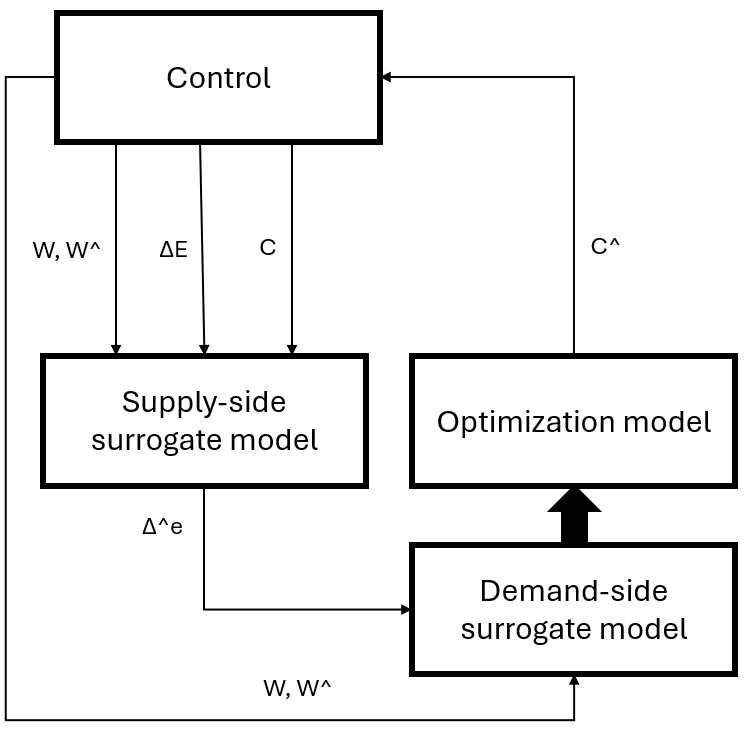

## 3.1 Sequence transmitted energy forecast model

In this work, we propose a refined Transformer-based architecture for sequence-to-sequence forecasting of heat demand in district heating systems (DHS). This approach builds upon our previous work (Zdravkovic et al, 2025), where we applied basic Transformer model to hourly heat demand forecasting using operational data from substations and ambient temperature records. While the results of that work confirmed the feasibility of applying attention-based architectures in this domain, in this paper, a series of improvements in data preprocessing, architectural regularization, loss scaling, and learning rate scheduling have been introduced. Those improvements led to enhancing convergence speed, robustness and generalization.

The dataset for sequence forecasting is acquired from a selected local DHS substation, and it consists of transmitted energy and control parameters time series data of 38710 time points covering five heating seasons from 2019 to 2024, with hourly resolution. The following data is considered:
- Outside air temperature, acquired by the sensor at the substation level (C, t_amb)
- Secondary supply water temperature (C, t_sup_sec)
- Secondary return water temperature (C, t_ret_sec)
- Primary supply water temperature (C, t_sup_prim)
- Primary return water temperature (C, t_ret_prim)
- Heat energy transmitted (MWh, e). This quantifies the amount of heat energy that has been transferred from the primary system through the substation to the secondary system and eventually to the buildings.

Extensive pre-processing of data has been carried out (Zdravkovic et al, 2025). Our forecasting model is based on the Transformer encoder-decoder architecture introduced by Vaswani et al. (2017). The model receives a multivariate input sequence and produces a prediction for each of the next 24 time steps. The improvements in the sequence forecasting model archiatecture have been carried out as described.

The original sinusoidal positional encoding is replaced with a learned positional embedding layer, allowing the model to adapt temporal representations to the specific characteristics of heat demand sequences. This modification has been shown to outperform fixed encodings in domain-specific applications where absolute temporal positions carry latent contextual information (Zerveas et al., 2021). To improve regularization and prevent overfitting on small to medium-sized datasets, we introduced dropout layers (rate = 0.2) at both the input stage and the final output projection layer. Additionally, we reduced the feedforward layer width from 512 to 128 neurons, optimizing for the smaller capacity required for DHS data compared to large-scale NLP tasks. We employ the Smooth L1 loss function (Huber loss), which exhibits robustness to outliers and stability during training. The default formulation with β = 1.0 is adjusted to β = 0.5 to encourage smaller step sizes during early optimization and faster convergence. For learning rate scheduling, instead of fixed-rate training we used ReduceLROnPlateau, which automatically decreases the learning rate when validation loss stagnates. This strategy allows the model to maintain exploration during early epochs and fine-tune parameters in later stages; the technique is widely recognized in time series forecasting literature as an effective way to stabilize training (Liu et al., 2022). Optimization is performed using the Adam optimizer (Kingma & Ba, 2015), with an initial learning rate of 1e-3. Gradient clipping is applied with a threshold of 1.0 to prevent exploding gradients, a known issue in Transformer architectures when applied to long sequences (Popel & Bojar, 2018).


## 3.2 Room temperature prediction model



The second stage addresses the unavailability of indoor temperature measurements by constructing a surrogate model of apartment-level thermal comfort. This surrogate model acts as a proxy for the physical building thermal response. While it does not model thermal mass or exact spatial distributions of temperature, it captures statistical relationships sufficient for control optimization (Drgoňa et al., 2020).

A separate dataset from a single heating season, collected from selected substation with access to indoor temperature data is used to train a regression model that maps forecasted transmitted energy and control variables to resulting indoor temperatures. The dataset after pre-processing comprises 12790 instances recorded at 15-minute intervals over a winter season. The output variable is the measured room temperature of one apartment. Independent variables include ambient outdoor temperature (t_amb), transmitted heating energy (deltae), temporal indicators (hour of day, day of week, working day flag), and lagged values of key physical variables.

The target variable is the measured indoor temperature, assumed to be representative of thermal comfort within a sample of residential units.

The prediction model is based on eXtreme Gradient Boosting (XGBoost), a robust ensemble method suitable for tabular data with heterogeneous feature types and potential nonlinear interactions. The XGBoost regressor was optimized using the Randomized grid search approach. A search space was defined for key hyperparameters including learning rate, maximum depth of trees, number of estimators, subsampling ratios, and the regularization term γ. The optimization objective was to minimize the Mean Absolute Error (MAE) on a test set, using an 80/20 train-test split.





# 4 Implementation and discussion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import time
import pickle
import os
from datetime import datetime

import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from torchmetrics import MeanAbsoluteError, MeanSquaredError

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

import ipywidgets as widgets
from IPython.display import display, clear_output

from tqdm import tqdm

## 4.1 Sequence forecasting of transmitted energy

In [18]:
github_folder = 'https://github.com/xai4heat/xai4heat/raw/main/datasets/'
files = ['xai4heat_scada_L4.csv']

weather_file='weather/ni_20_rs.csv'

dfw = pd.read_csv(github_folder+weather_file)

dfw['datetime'] = pd.to_datetime(dfw['datetime'])
dfw.set_index('datetime',inplace=True)

# Removing irrelevant data
dfw=dfw.drop(['name',
              'precipprob',
              'preciptype',
              'icon',
              'stations'], axis=1)

def strip_out_season_data(df):
  date_range_season1 = (df.index >= pd.to_datetime('2018-11-01 06:00:00')) & (df.index < pd.to_datetime('2019-04-01 23:00:00'))
  date_range_season2 = (df.index >= pd.to_datetime('2019-11-01 06:00:00')) & (df.index < pd.to_datetime('2020-04-01 23:00:00'))
  date_range_season3 = (df.index >= pd.to_datetime('2020-11-01 06:00:00')) & (df.index < pd.to_datetime('2021-04-01 23:00:00'))
  date_range_season4 = (df.index >= pd.to_datetime('2021-11-01 06:00:00')) & (df.index < pd.to_datetime('2022-04-01 23:00:00'))
  date_range_season5 = (df.index >= pd.to_datetime('2022-11-01 06:00:00')) & (df.index < pd.to_datetime('2023-04-01 23:00:00'))
  date_range_season6 = (df.index >= pd.to_datetime('2023-11-01 06:00:00')) & (df.index < pd.to_datetime('2024-04-01 23:00:00'))
  df = df[date_range_season1 | date_range_season2 | date_range_season3 | date_range_season4 | date_range_season5 | date_range_season6]
  return df


all_data=[]
for i in files:
  df = pd.read_csv(github_folder+i)
  df['datetime'] = pd.to_datetime(df['datetime'])
  df.set_index('datetime',inplace=True)

  # For each sub, show data acquisition periods
  print(i)
  print('Timeline (from/to): ', df.index.min(), df.index.max())

  # Remove data outside of the heating season
  df=strip_out_season_data(df)

  # Strip all data except data acquired at full hour
  df = df[df.index.minute == 0]

  #Insert missing timepoints, populate with NaNs
  complete_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
  df = df.reindex(complete_time_index)

  #Show number of enery zero data - inaccurate readings at calorimeter
  zero_count = (df['e'] == 0).sum()
  print('Data transmission failures: ', str(zero_count)+'/'+str(len(df)))

  #Merging with weather data
  df = pd.merge(df, dfw, left_index=True, right_index=True, how='inner')

  all_data.append(df)

columns_to_update = ['t_amb', 't_ref', 't_sup_prim', 't_ret_prim', 't_sup_sec', 't_ret_sec']

for i, dfa in enumerate(all_data):
  dfa['e'] = dfa['e'].replace(0, np.nan)
  for column in columns_to_update:
    dfa.loc[dfa['e'].isna(), column] = np.nan
  dfa.interpolate(method='linear', inplace=True)
  all_data[i]=dfa

xai4heat_scada_L4.csv
Timeline (from/to):  2019-08-05 13:00:00 2024-04-04 11:52:00
Data transmission failures:  2200/38712


C:\Users\Milan\AppData\Local\Temp\ipykernel_103128\1225887344.py:46: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  complete_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
C:\Users\Milan\AppData\Local\Temp\ipykernel_103128\1225887344.py:64: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dfa.interpolate(method='linear', inplace=True)


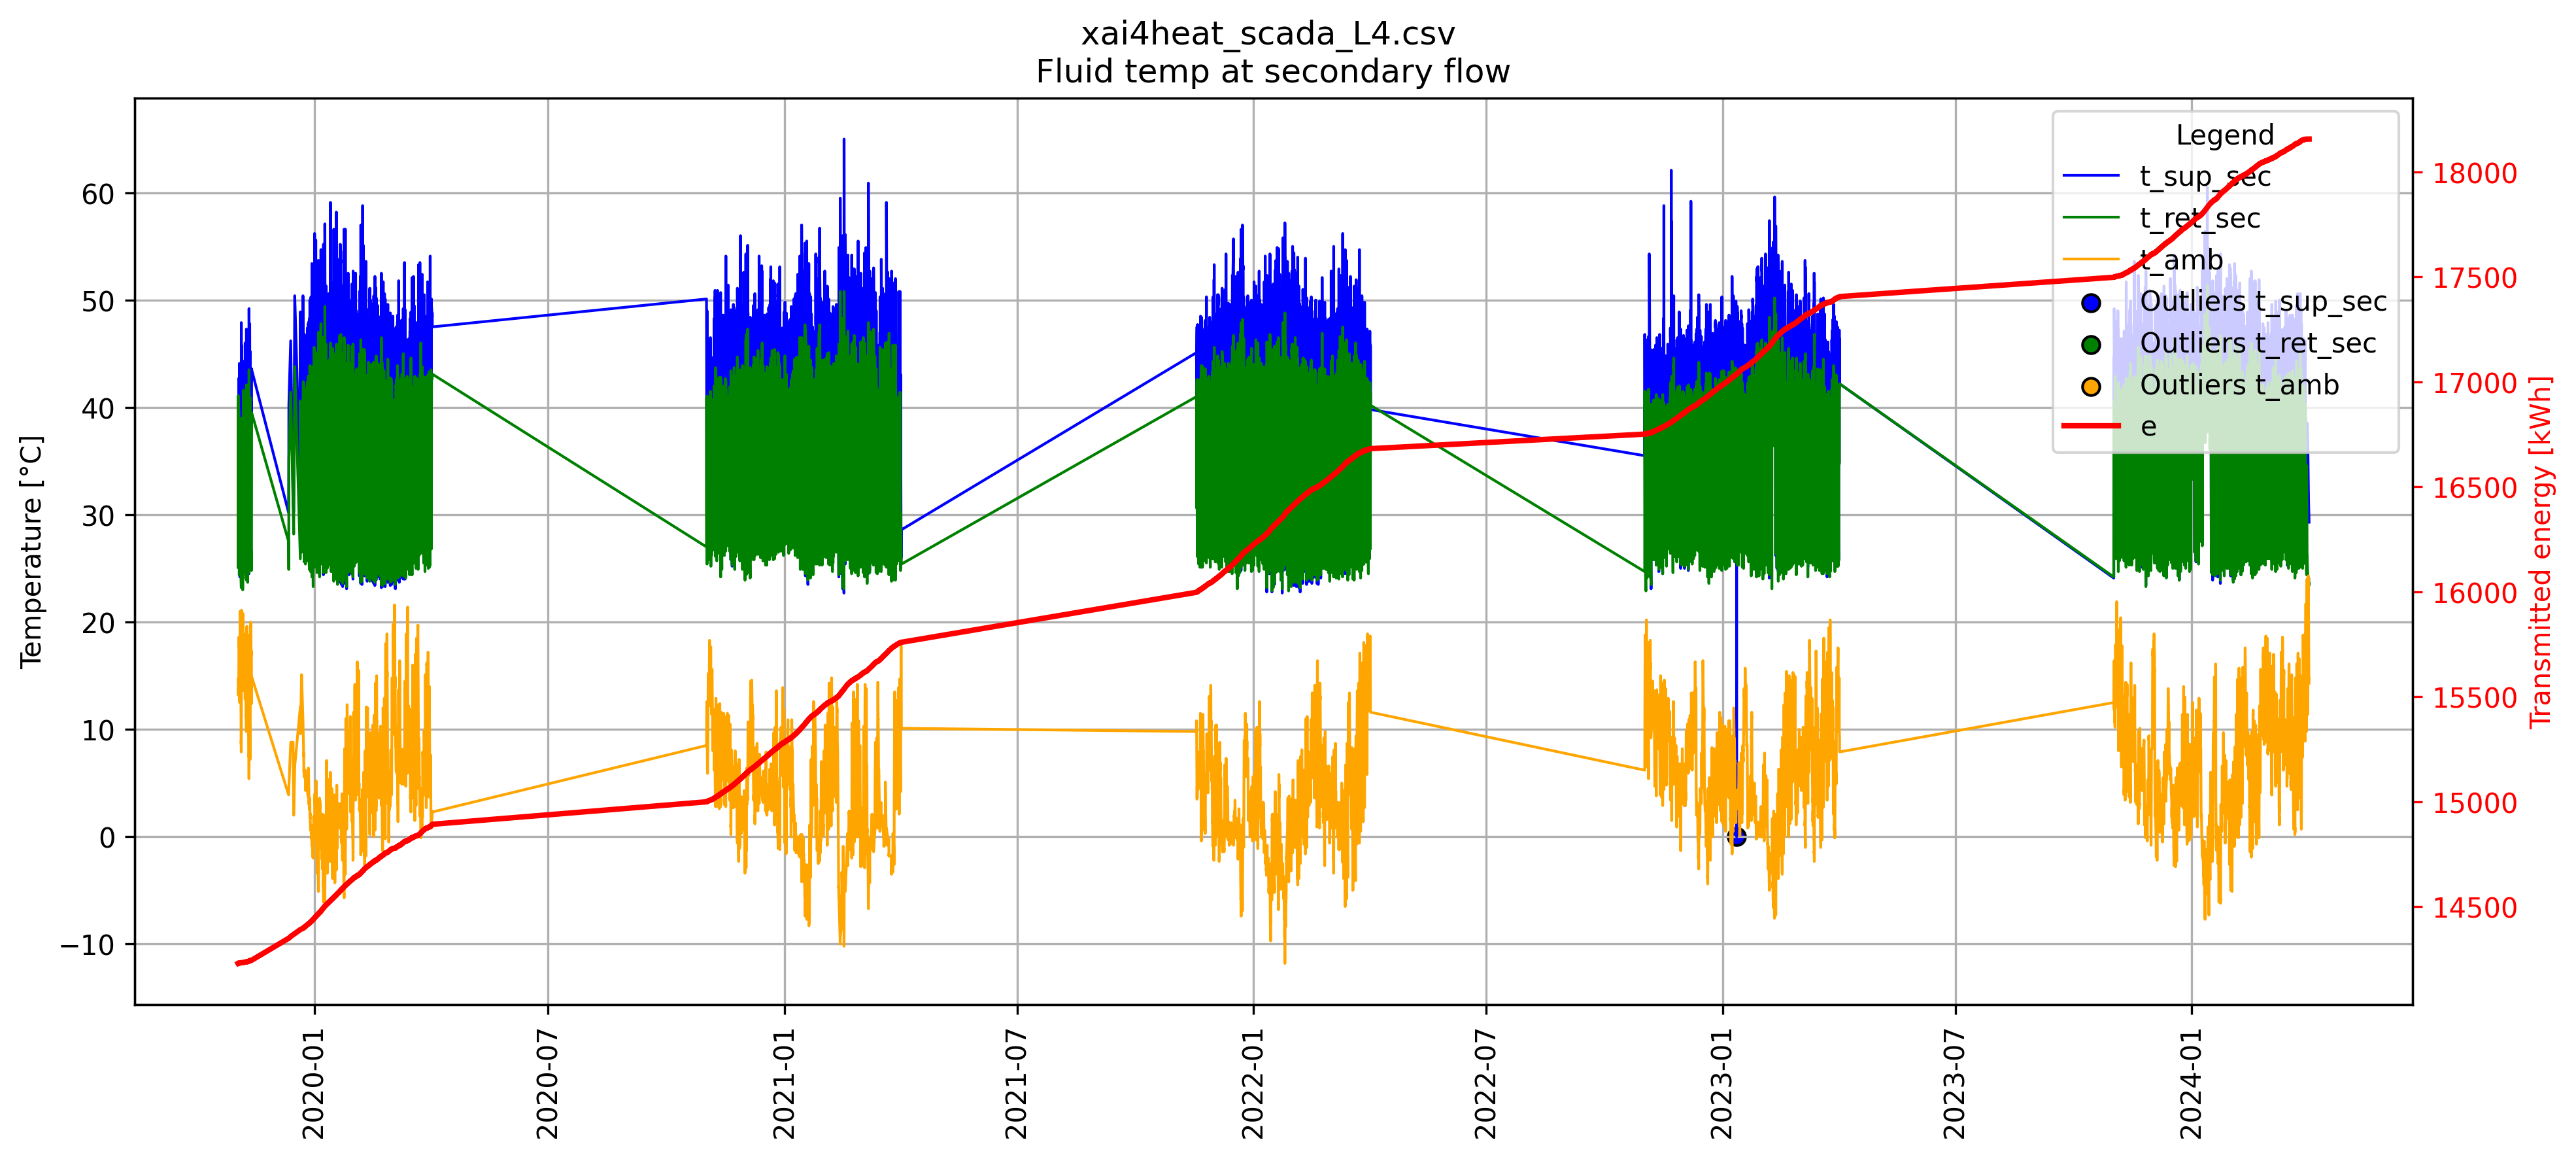

In [19]:
num_plots = len(all_data)
num_rows = math.ceil(num_plots / 2)


def find_outliers(series):
    """Calculate z-scores and identify outliers in a series."""
    mean = series.mean()
    std = series.std()
    z_scores = (series - mean) / std
    return series[np.abs(z_scores) > 5]


# Create subplots with high resolution for print (300 DPI)
fig, axs = plt.subplots(num_rows, 2, figsize=(25, 6*num_rows), dpi=300)

axs = axs.flatten()

# Loop through each DataFrame in the list
for i, df in enumerate(all_data):
    axs[i].plot(df['t_sup_sec'], label='t_sup_sec', linewidth=1, color='blue')
    axs[i].plot(df['t_ret_sec'], label='t_ret_sec', linewidth=1, color='green')
    axs[i].plot(df['t_amb'], label='t_amb', linewidth=1, color='orange')

    # Calculate and plot outliers for t_sup_sec
    outliers_sup = find_outliers(df['t_sup_sec'])
    axs[i].scatter(outliers_sup.index, outliers_sup, color='blue', s=40, label='Outliers t_sup_sec', edgecolors='k')

    # Calculate and plot outliers for t_ret_sec
    outliers_ret = find_outliers(df['t_ret_sec'])
    axs[i].scatter(outliers_ret.index, outliers_ret, color='green', s=40, label='Outliers t_ret_sec', edgecolors='k')

    # Calculate and plot outliers for t_amb
    outliers_amb = find_outliers(df['t_amb'])
    axs[i].scatter(outliers_amb.index, outliers_amb, color='orange', s=40, label='Outliers t_amb', edgecolors='k')


    axs_e = axs[i].twinx()
    axs_e.plot(df.index, df['e'], color='red', label='e', linewidth=2)
    axs_e.set_ylabel('Transmitted energy [kWh]', color='red')
    axs_e.tick_params(axis='y', colors='red')

    axs[i].set_title(f'{files[i]} \nFluid temp at secondary flow')
    axs[i].set_ylabel('Temperature [°C]')

    lines, labels = axs[i].get_legend_handles_labels()
    lines_e, labels_e = axs_e.get_legend_handles_labels()
    axs[i].legend(lines + lines_e, labels + labels_e, title='Legend')

    axs[i].tick_params(axis='x', rotation=90)
    axs[i].grid(True)

if num_plots % 2 != 0:
    fig.delaxes(axs[num_plots])

plt.tight_layout()
plt.show()

In [8]:
def replace_outliers(series):
    """Identify outliers using z-scores and replace them with NaN."""
    mean = series.mean()
    std = series.std()
    z_scores = (series - mean) / std
    # Replace with NaN where condition is met
    series[np.abs(z_scores) > 5] = np.nan
    return series

for i, df in enumerate(all_data):
    # Replace outliers with NaNs for each relevant column
    df['t_sup_sec'] = replace_outliers(df['t_sup_sec'].copy())
    df['t_ret_sec'] = replace_outliers(df['t_ret_sec'].copy())
    df['t_amb'] = replace_outliers(df['t_amb'].copy())

    # Interpolate to fill NaNs
    df['t_sup_sec'].interpolate(inplace=True)
    df['t_ret_sec'].interpolate(inplace=True)
    df['t_amb'].interpolate(inplace=True)

    all_data[i]=df

C:\Users\Milan\AppData\Local\Temp\ipykernel_103128\1911501705.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['t_sup_sec'].interpolate(inplace=True)
C:\Users\Milan\AppData\Local\Temp\ipykernel_103128\1911501705.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [9]:
all_data[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38711 entries, 2019-11-01 06:00:00 to 2024-04-01 05:00:00
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   t_amb             38675 non-null  float64
 1   t_ref             38675 non-null  float64
 2   t_sup_prim        38675 non-null  float64
 3   t_ret_prim        38675 non-null  float64
 4   t_sup_sec         38675 non-null  float64
 5   t_ret_sec         38675 non-null  float64
 6   e                 38675 non-null  float64
 7   pe                29228 non-null  float64
 8   temp              38711 non-null  float64
 9   feelslike         38711 non-null  float64
 10  dew               38711 non-null  float64
 11  humidity          38711 non-null  float64
 12  precip            38711 non-null  float64
 13  snow              38711 non-null  float64
 14  snowdepth         38711 non-null  float64
 15  windgust          38711 non-null  float64
 16  winds

In [10]:
dropcolumns=['solarenergy',
             'uvindex',
             'severerisk',
             'visibility',
             'cloudcover',
             'snow',
             'dew',
             'conditions',
             'e',
             'pe']

for i, df in enumerate(all_data):
  df['hour_of_day'] = df.index.hour
  df['month'] = df.index.month
  df['day_of_week'] = df.index.dayofweek
  df['is_working_day'] = df['day_of_week'].apply(lambda x: 1 if x < 5 else 0)
  deltae=(df['e']-df['e'].shift(1))*1000

  df['heating_on'] = deltae.apply(lambda x: 1 if x != 0 else 0)
  df['deltae']=deltae


  df=df.drop(columns=dropcolumns, axis=1)
  df=df.dropna()
  all_data[i]=df



dftamb=all_data[0][['t_amb', 'deltae', 'hour_of_day', 'day_of_week', 'is_working_day']].copy()


rmv= ['day_of_week', 'is_working_day', 'precip', 'windgust', 'windspeed', 'winddir', 't_amb', 't_sup_prim', 't_ret_prim', 't_sup_sec', 't_ret_sec', 't_ref', 'month']

for i, df in enumerate(all_data):
  dfx=df.drop(rmv, axis=1)
  all_data[i]=dfx

In [11]:
data=all_data[0]

In [12]:
num_lags = 24

# Create lagged features for deltae
for lag in range(1, num_lags + 1):
    data[f'deltae_lag_{lag}'] = data['deltae'].shift(lag)

# Remove rows with NaN values that result from shifting
data = data.dropna()

In [13]:
# Create lagged features for deltae
for lag in range(1, 25):
    data[f'temp_next_{lag}'] = data['temp'].shift(-lag)

# Remove rows with NaN values that result from shifting
data = data.dropna()

C:\Users\Milan\AppData\Local\Temp\ipykernel_103128\257260179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'temp_next_{lag}'] = data['temp'].shift(-lag)
C:\Users\Milan\AppData\Local\Temp\ipykernel_103128\257260179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'temp_next_{lag}'] = data['temp'].shift(-lag)
C:\Users\Milan\AppData\Local\Temp\ipykernel_103128\257260179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [14]:
train_size=int(0.8*len(data))
train = data[:train_size]
test = data[train_size:]


# Selecting features and target
features = train.drop(columns=['deltae'])
target = train['deltae']

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert to PyTorch tensors
features_tensor = torch.tensor(features_scaled, dtype=torch.float32)
target_tensor = torch.tensor(target.values, dtype=torch.float32).view(-1, 1)

# Input sequence length and future prediction length
N = 24  # Number of time steps in each input sequence
M = 24  # Number of time steps to predict

# Prepare sequences
sequences = [features_tensor[i:i+N] for i in range(len(features_tensor) - N - M + 1)]
targets = [target_tensor[i+N:i+N+M] for i in range(len(target_tensor) - N - M + 1)]

# Convert to tensors and create datasets
sequences_tensor = torch.stack(sequences)
targets_tensor = torch.stack(targets).view(len(targets), M)  # Ensure targets are properly shaped

# DataLoader setup
dataset = TensorDataset(sequences_tensor, targets_tensor)
train_size = int(0.8 * len(dataset))

# Use sequential split instead of random_split to preserve temporal order
train_dataset = torch.utils.data.Subset(dataset, range(0, train_size))
val_dataset = torch.utils.data.Subset(dataset, range(train_size, len(dataset)))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


# Test set handling (similar approach)
test_features = test.drop(columns=['deltae'])
test_target = test['deltae']
test_features_scaled = scaler.transform(test_features)  # Use the same scaler as for the training data
test_features_tensor = torch.tensor(test_features_scaled, dtype=torch.float32)
test_target_tensor = torch.tensor(test_target.values, dtype=torch.float32).view(-1, 1)

# Prepare sequences for testing
test_sequences = [test_features_tensor[i:i+N] for i in range(len(test_features_tensor) - N - M + 1)]
test_targets = [test_target_tensor[i+N:i+N+M] for i in range(len(test_target_tensor) - N - M + 1)]

# Convert to tensors and create test dataset
test_sequences_tensor = torch.stack(test_sequences)
test_targets_tensor = torch.stack(test_targets).view(len(test_targets), M)  # Ensure targets are properly shaped

test_dataset = TensorDataset(test_sequences_tensor, test_targets_tensor)
test_loader = DataLoader(test_dataset, batch_size=32)

In [15]:
MAX_SEQ_LEN = 168  # Set to maximum expected input sequence length


# Learned Positional Embedding
class LearnedPositionalEmbedding(nn.Module):
    def __init__(self, max_len, d_model):
        super().__init__()
        self.pos_embedding = nn.Embedding(max_len, d_model)

    def forward(self, x):
        seq_len = x.size(0)
        positions = torch.arange(seq_len, device=x.device).unsqueeze(1)
        pos_emb = self.pos_embedding(positions).expand(-1, x.size(1), -1)
        return x + pos_emb


# Optional Callback for Visualizing Training Loss
class PlotLossCallback(pl.Callback):
    def __init__(self):
        super().__init__()
        self.losses = []

    def on_train_batch_end(self, trainer, pl_module, outputs, batch, batch_idx):
        self.losses.append(outputs["loss"].item())

    def on_train_end(self, trainer, pl_module):
        plt.plot(np.arange(len(self.losses)), self.losses, label="Training Loss")
        plt.xlabel("Batch")
        plt.ylabel("Loss")
        plt.title("Training Loss Curve")
        plt.legend()
        plt.show()


# Final Transformer Model
class TimeSeriesTransformer(pl.LightningModule):
    def __init__(self, input_dim, num_outputs=24, dim_feedforward=512, nhead=4, num_layers=3,
                 dropout=0.2, max_seq_len=MAX_SEQ_LEN):
        super().__init__()
        self.save_hyperparameters()

        self.input_dim = input_dim
        self.dropout_in = nn.Dropout(dropout)

        # Transformer + Positional Embedding
        self.pos_encoder = LearnedPositionalEmbedding(max_len=max_seq_len, d_model=input_dim)
        self.transformer = nn.Transformer(
            d_model=input_dim,
            nhead=nhead,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=False
        )

        # Output layer with dropout
        self.linear_out = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(input_dim, 1)
        )

        # Metrics
        self.val_mae = MeanAbsoluteError()
        self.val_rmse = MeanSquaredError(squared=False)

        # Robust Loss
        self.criterion = nn.SmoothL1Loss()

    def forward(self, src):
        src = src.permute(1, 0, 2)  # [seq_len, batch, features]
        src = self.pos_encoder(self.dropout_in(src))
        output = self.transformer(src, src)
        output = self.linear_out(output)
        return output.permute(1, 0, 2)  # [batch, seq_len, 1]

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        y = y.view_as(y_hat)
        loss = self.criterion(y_hat, y)
        self.log("train_loss", loss)
        return {"loss": loss}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        y = y.view_as(y_hat)
        loss = self.criterion(y_hat, y)
        self.log("val_loss", loss, on_epoch=True)
        self.val_mae(y_hat.flatten(), y.flatten())
        self.val_rmse(y_hat.flatten(), y.flatten())
        return {"val_loss": loss}

    def on_validation_epoch_end(self):
        self.log("val_mae", self.val_mae.compute(), prog_bar=True)
        self.log("val_rmse", self.val_rmse.compute(), prog_bar=True)
        self.val_mae.reset()
        self.val_rmse.reset()

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
          optimizer, mode='min', patience=3, factor=0.5
        )
        return {"optimizer": optimizer,
                'lr_scheduler': {
                  'scheduler': scheduler,
                  'monitor': 'val_loss',
                  'interval': 'epoch',
                  'frequency': 1
                }}

In [16]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop if no improvement after 5 epochs
    mode='min',
    verbose=True
)

# Initialize the model
model = TimeSeriesTransformer(input_dim=features_tensor.shape[1],
                              num_outputs=24,
                              nhead=7, # with weather forecast
                              #nhead=4, # without weather forecast
                              dim_feedforward=128,  # Size of the feedforward network
                              num_layers=3,  # Number of layers in the encoder and decoder
                              dropout=0.1)  # Dropout rate

model.steps_per_epoch = len(train_loader)

# Create a PyTorch Lightning trainer and fit the model
trainer = pl.Trainer(max_epochs=50,
                     callbacks=[PlotLossCallback(), early_stop_callback],
                     #accelerator='gpu',
                     gradient_clip_val=1.0,
                     #devices=1 if torch.cuda.is_available() else None)
                    devices=1)

#trainer = pl.Trainer(max_epochs=10, accelerator='cpu', callbacks=[PlotLossCallback()])
trainer.fit(model, train_loader, val_loader)

c:\Users\Milan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name        | Type                       | Params | Mode 
-------------------------------------------------------------------
0 | dropout_in  | Dropout                    | 0      | train
1 | pos_encoder | LearnedPositionalEmbedding | 9.4 K  | train
2 | transformer | Transformer                | 203 K  | train
3 | linear_out  | Sequential                 | 57     | train
4 | val_mae     | MeanAbsoluteError          | 0      | train
5 | val_rmse    | MeanSquaredError           | 0      | train
6 | criterion   | SmoothL1Loss               | 0      | train
-------------------------------------------------------------------
213 K     Trainable params
0         Non-trainable params
213 K     Total params
0.854     Total estimated model params size (MB)
88        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\Milan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\Milan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 103.131


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 23.022 >= min_delta = 0.0. New best score: 80.109


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

In [ ]:
# Correct path with spaces
output_dir = "/content/drive/MyDrive/Projects/FondZaNauku/Prizma/Research/Initial forecasting model/notebooks/models"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "transformer_model.pkl")

# Save the model
with open(output_path, "wb") as f:
    pickle.dump(model, f)

print(f"Model saved to: {output_path}")

Model saved to: /content/drive/MyDrive/Projects/FondZaNauku/Prizma/Research/Initial forecasting model/notebooks/models/transformer_model.pkl


In [ ]:
output_path = os.path.join(output_dir, "transformer_scaler.pkl")

# Save the model
with open(output_path, "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    mae_metric = MeanAbsoluteError()
    rmse_metric = MeanSquaredError(squared=False)
    with torch.no_grad():
        for x, y in test_loader:
            # Ensure x has the expected shape; assuming it's already correct, no need to unsqueeze
            y_hat = model(x)  # Forward pass

            # Reshape y_hat and y if necessary, ensure these tensors are compatible
            # Flatten the sequence and batch dimensions to treat all predictions equally
            y_hat_flat = y_hat.reshape(-1)  # Flatten all batches and sequences
            y_flat = y.reshape(-1)  # Flatten all batches and sequences

            # Update metrics
            mae_metric.update(y_hat_flat, y_flat)
            rmse_metric.update(y_hat_flat, y_flat)

    # Compute final metric values
    mae = mae_metric.compute()
    rmse = rmse_metric.compute()
    return mae.item(), rmse.item()

# Assuming 'model' is your trained model instance and 'test_loader' is set up
mae, rmse = evaluate_model(model, test_loader)
print(f"Mean Absolute Error on Test Set: {mae:.4f}")
print(f"Root Mean Square Error on Test Set: {rmse:.4f}")

Mean Absolute Error on Test Set: 20.2056
Root Mean Square Error on Test Set: 61.6118


In [ ]:
timepoint_index=0
hours_forecasts=[]
hours_actuals=[]
numhours=24

# Iterate over the test loader to get forecasts and actual values for the chosen timepoint
with torch.no_grad():
  for tp in range(0,numhours):
    forecasts = []
    actuals = []
    for inputs, targets in test_loader:
          # Make predictions using the model
          predictions = model(inputs)

          # Extract forecasts and actual values for the chosen timepoint from each sample in the batch
          for i in range(len(inputs)):
            # Extract forecasts and actual values for the specified timepoint from each sample
            forecast = predictions[i, tp].item()
            actual = targets[i, tp].item()

            # Append the forecasts and actual values to the respective lists
            forecasts.append(forecast)
            actuals.append(actual)
    hours_forecasts.append(forecasts)
    hours_actuals.append(actuals)

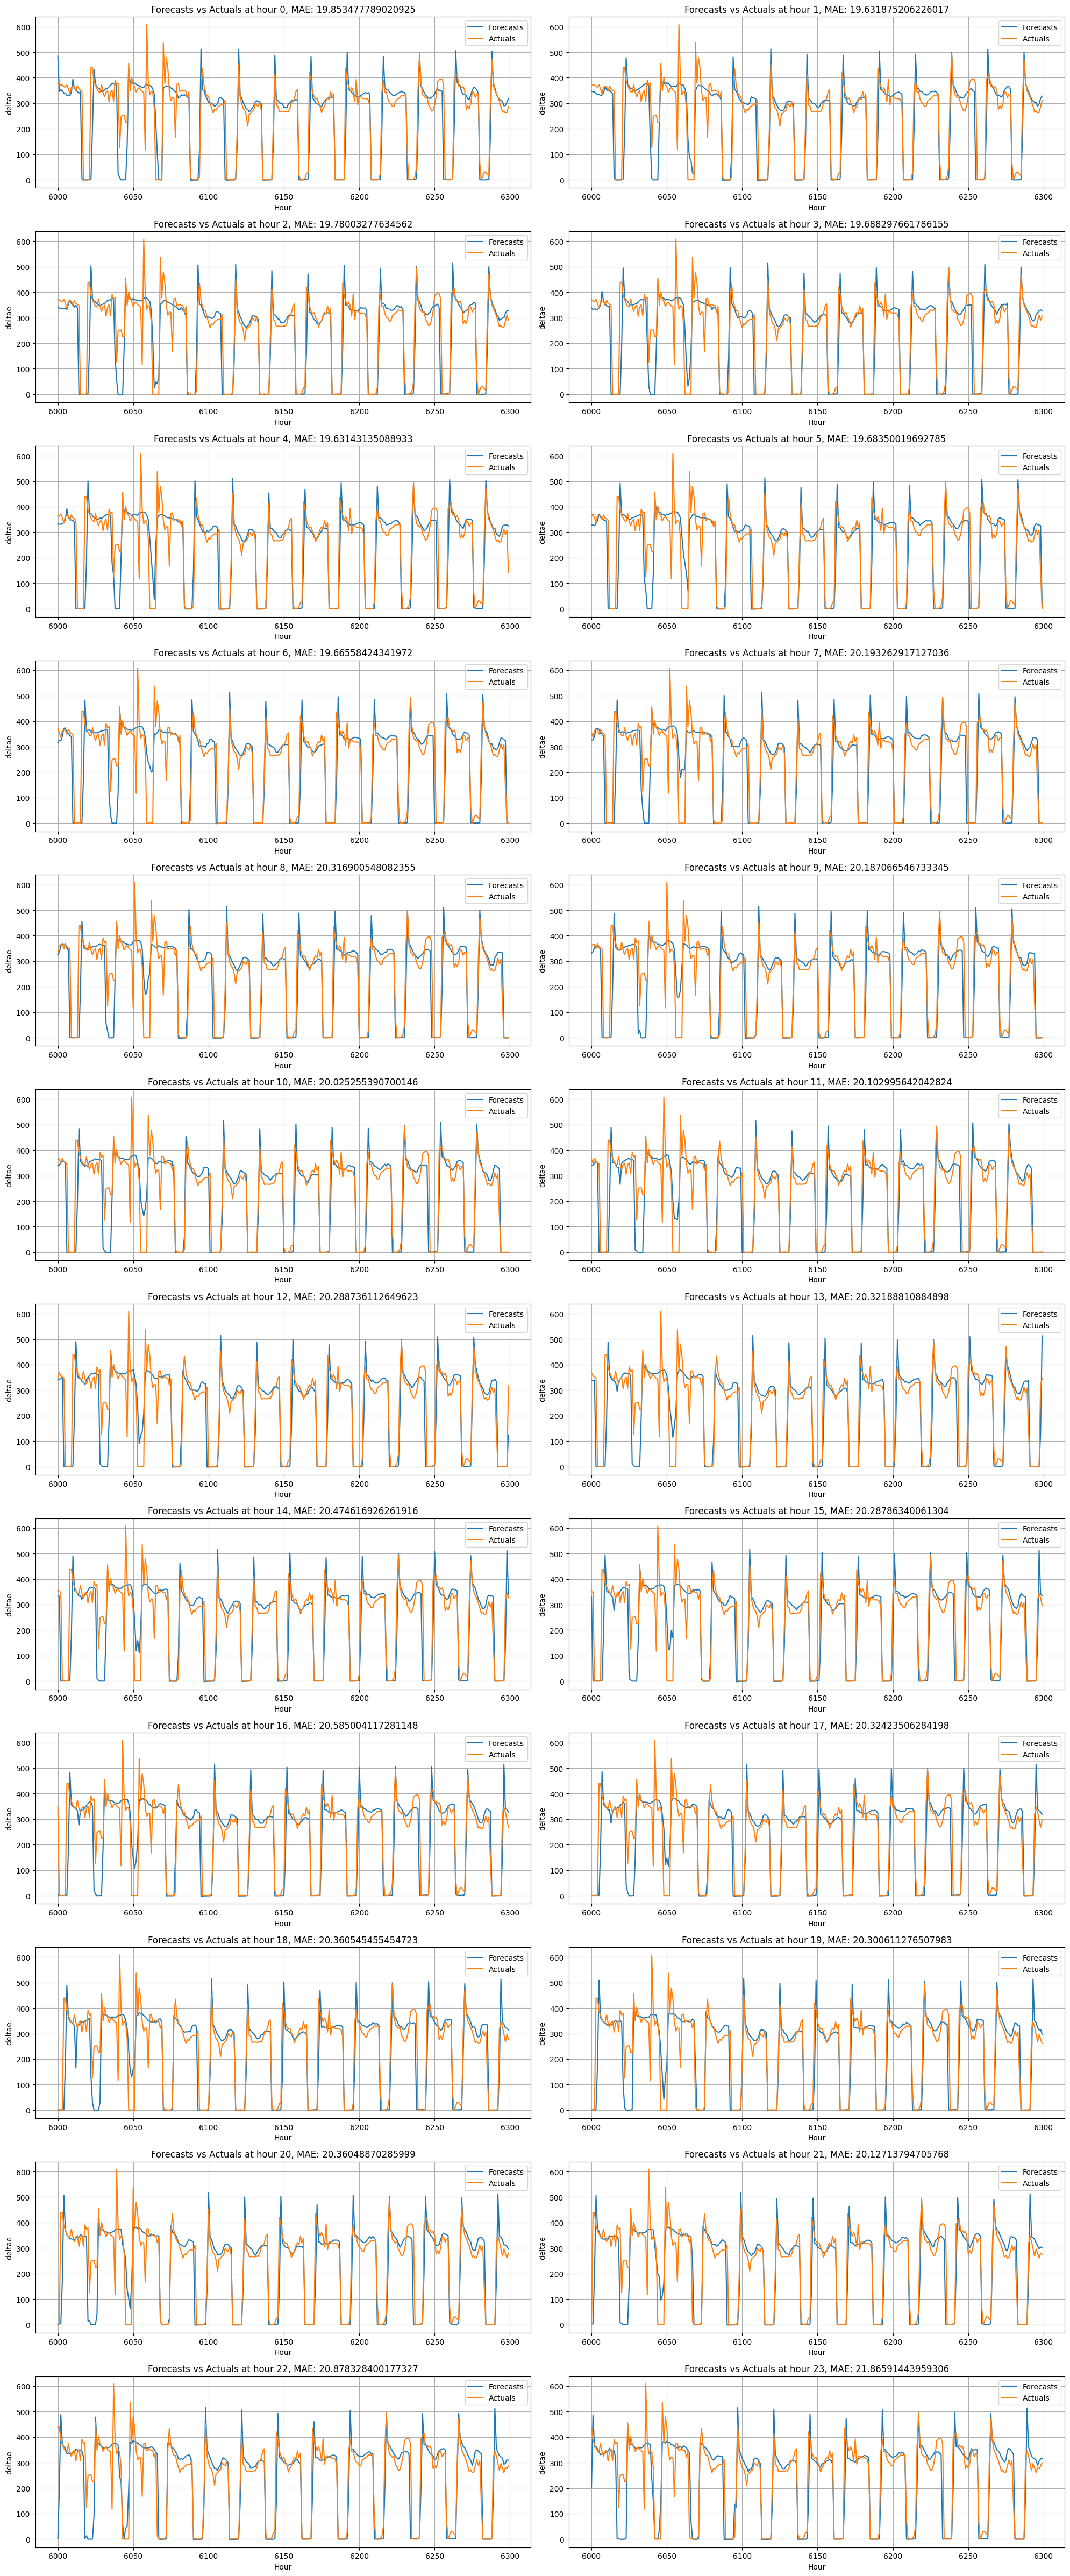

In [ ]:
start = 6000
end = 6300
num_hours = len(hours_forecasts)
maes=[]
# Create a figure with multiple subplots
num_rows = (num_hours + 1) // 2  # Number of rows for subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows*4))

# Iterate over the forecasts and actuals
for i in range(num_hours):
    actuals_array = np.array(hours_actuals[i])
    forecasts_array = np.array(hours_forecasts[i])
    mae = np.mean(np.abs(actuals_array - forecasts_array))
    maes.append(mae)
    row_index = i // 2  # Calculate the row index for the subplot
    col_index = i % 2   # Calculate the column index for the subplot

    # Plot the forecasts and actual values in the subplot
    ax = axes[row_index, col_index]
    hours = np.arange(len(hours_forecasts[i]))
    ax.plot(hours[start:end], hours_forecasts[i][start:end], label='Forecasts')
    ax.plot(hours[start:end], hours_actuals[i][start:end], label='Actuals')
    ax.set_xlabel('Hour')
    ax.set_ylabel('deltae')
    ax.set_title(f'Forecasts vs Actuals at hour {i}, MAE: {mae}')
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

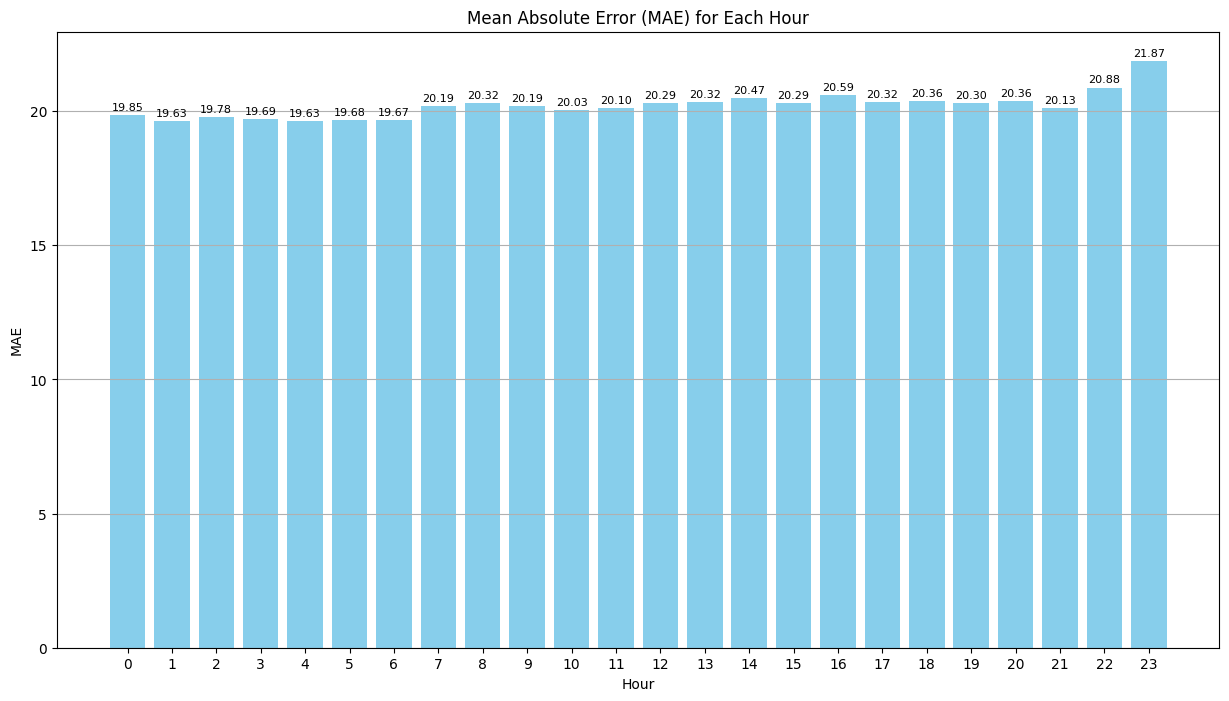

In [ ]:
hours = range(24)

# Plot the bar chart
plt.figure(figsize=(15, 8))  # Adjust the width and height as needed
bars = plt.bar(hours, maes, color='skyblue')
plt.xlabel('Hour')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) for Each Hour')
plt.xticks(hours)  # Ensure all hours are displayed on the x-axis
plt.grid(axis='y')  # Add grid lines along the y-axis

# Annotate each bar with its corresponding MAE value
for bar, mae in zip(bars, maes):
    plt.text(bar.get_x() + bar.get_width() / 2,  # x-coordinate of text
             bar.get_height()+0.1,                  # y-coordinate of text
             f'{mae:.2f}',                      # Text to display (formatted MAE value)
             ha='center', va='bottom',          # Text alignment
             color='black',                     # Text color
             fontsize=8)


plt.show()

In [ ]:
std = np.std(maes)

print("Standard Deviation:", std)

Standard Deviation: 0.4735351444695133


In [ ]:
import numpy as np
print(np.std([19.85, 19.63, 19.78, 19.69, 19.63, 19.68, 19.67]))
print(np.mean([19.85, 19.63, 19.78, 19.69, 19.63, 19.68, 19.67]))

0.07556589231679038
19.704285714285714


## 4.2 Predicting thermal comfort

In [ ]:
url_folder = "https://github.com/xai4heat/xai4heat/raw/main/datasets/"
file ='xai4heat_2024-25_L4.csv'

url = url_folder + file
df = pd.read_csv(url, parse_dates=True)
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)

# Define substrings to remove
to_remove = ["relative_humidity", "davis_", "forecast_", "co2_", "t_ref", "t_sup_prim", "t_ret_prim", "t_sup_sec", "t_ret_sec"]

# Drop columns containing any of those substrings
df = df.drop(columns=[col for col in df.columns if any(sub in col for sub in to_remove)])

# New features
df['hour_of_day'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['is_working_day'] = df['day_of_week'].apply(lambda x: 1 if x < 5 else 0)
df = df.rename(columns={"temperature_37_2": "tr_1",
                        "temperature_37_4": "tr_2",
                        "temperature_37_9": "tr_3",
                        "temperature_37_12": "tr_4",
                        "temperature_37_15": "tr_5"})


# Rename columns related to temperature to anonymize
df = df.rename(columns={"qizm": "deltae"})

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12898 entries, 2024-11-17 06:00:00 to 2025-03-31 23:45:00
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t_amb           12898 non-null  float64
 1   deltae          12898 non-null  float64
 2   tr_4            12797 non-null  float64
 3   tr_5            12797 non-null  float64
 4   tr_1            12789 non-null  float64
 5   tr_2            12797 non-null  float64
 6   tr_3            12796 non-null  float64
 7   hour_of_day     12898 non-null  int32  
 8   day_of_week     12898 non-null  int32  
 9   is_working_day  12898 non-null  int64  
dtypes: float64(7), int32(2), int64(1)
memory usage: 1007.7 KB


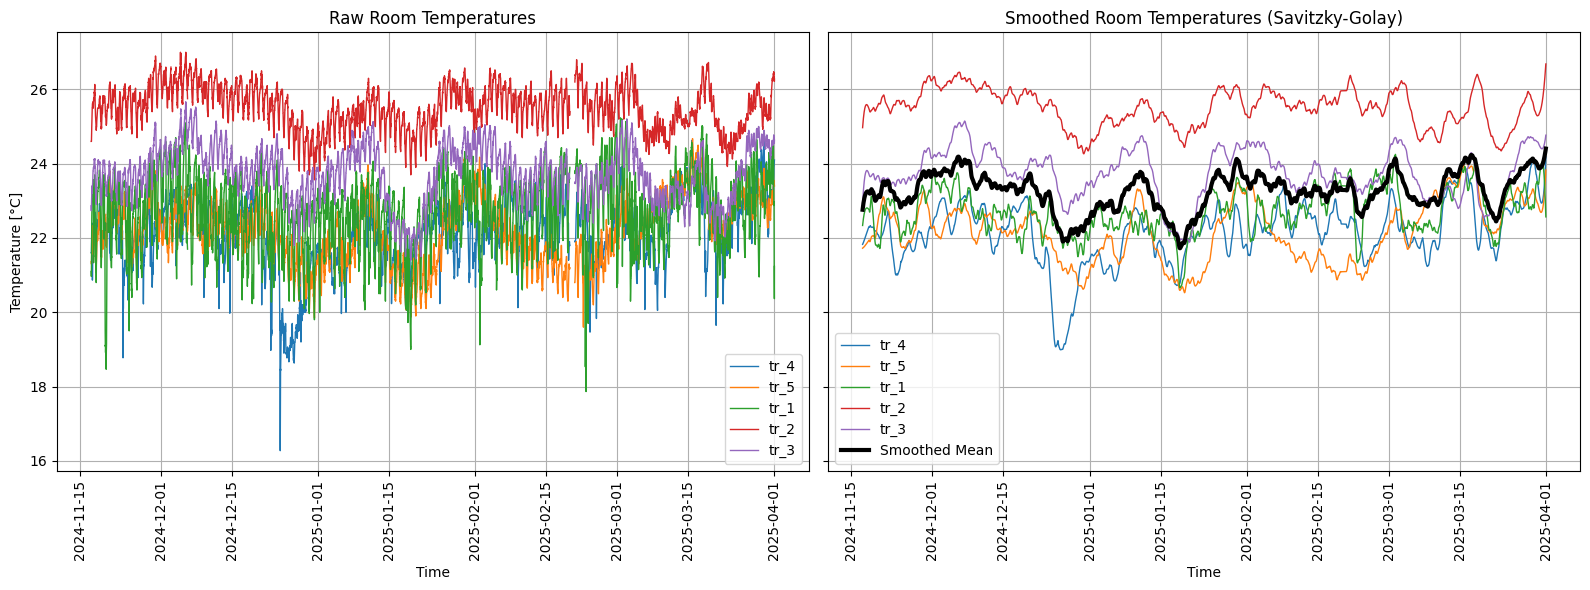

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# === Configuration ===
temp_cols = [col for col in df.columns if col.startswith("tr_")]
window_length = 249  # must be odd and <= len(df)
polyorder = 3       # polynomial order for the filter

# === Compute mean and smoothed values ===
mean_temp = df[temp_cols].mean(axis=1)

# Apply Savitzky-Golay filter (drop NaNs to avoid issues)
df_clean = df[temp_cols].dropna()
smoothed_df = pd.DataFrame(index=df_clean.index)

for col in temp_cols:
    smoothed_df[col] = savgol_filter(df_clean[col], window_length=window_length, polyorder=polyorder)

smoothed_mean_temp = smoothed_df.mean(axis=1)

# === Plot ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Left: original temperatures
for col in temp_cols:
    ax1.plot(df.index, df[col], label=col, linewidth=1)
#ax1.plot(df.index, mean_temp, label="Mean Temperature", color="black", linewidth=3)
ax1.set_title("Raw Room Temperatures")
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature [°C]")
ax1.legend()
ax1.tick_params(axis='x', rotation=90)
ax1.grid(True)

# Right: smoothed temperatures
for col in temp_cols:
    ax2.plot(smoothed_df.index, smoothed_df[col], label=col, linewidth=1)
ax2.plot(smoothed_df.index, smoothed_mean_temp, label="Smoothed Mean", color="black", linewidth=3)
ax2.set_title("Smoothed Room Temperatures (Savitzky-Golay)")
ax2.set_xlabel("Time")
ax2.legend()
ax2.tick_params(axis='x', rotation=90)
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Select only temperature columns
temperature_columns = [col for col in df.columns if col.startswith("tr_")]

# Calculate standard deviation for each apartment
temperature_std = df[temperature_columns].std()

# Display result
print("Standard Deviation of Room Temperatures:")
print(temperature_std)

Standard Deviation of Room Temperatures:
tr_4    0.956904
tr_5    0.882374
tr_1    1.013164
tr_2    0.590064
tr_3    0.747790
dtype: float64


The room temperature data indicate significantly different values and variations across apartments. These differences can be attributed to irregularities in consumer behavior, namely frequencies of ventilation, dynamism of usage patterns (work shifts, travel, etc.) and frequent manual radiator control, but also to locations of the apartments (if they are corner or top-floor units, they might be more exposed to outside temperatures, increasing fluctuation).

In this research, we are not going to account for those differences. As it is considered as a proof of concept, a reference apartment 3 will be adopted as a target one.

In [ ]:
df = df.drop(columns=['tr_1', 'tr_2', 'tr_4', 'tr_5'])

Pre-processing is done, lagged variables are introduced for deltae and t_amb. Data from past six hours will be considered. All missing data will be removed. Datetime index is removed as this is not a time series data anymore.

In [ ]:
# Create lagged features for deltae and t_amb
for lag in range(1, 7):
    df[f'deltae_lag_{lag}'] = df['deltae'].shift(lag)
    df[f't_amb_lag_{lag}'] = df['t_amb'].shift(lag)

df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12780 entries, 0 to 12779
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t_amb           12780 non-null  float64
 1   deltae          12780 non-null  float64
 2   tr_4            12780 non-null  float64
 3   tr_5            12780 non-null  float64
 4   tr_1            12780 non-null  float64
 5   tr_2            12780 non-null  float64
 6   tr_3            12780 non-null  float64
 7   hour_of_day     12780 non-null  int32  
 8   day_of_week     12780 non-null  int32  
 9   is_working_day  12780 non-null  int64  
 10  deltae_lag_1    12780 non-null  float64
 11  t_amb_lag_1     12780 non-null  float64
 12  deltae_lag_2    12780 non-null  float64
 13  t_amb_lag_2     12780 non-null  float64
 14  deltae_lag_3    12780 non-null  float64
 15  t_amb_lag_3     12780 non-null  float64
 16  deltae_lag_4    12780 non-null  float64
 17  t_amb_lag_4     12780 non-null 

The performance of the final model was assessed using MAE and the coefficient of determination (R²) on the test set. Additionally, a scatter plot of predicted vs. actual values was used to evaluate predictive alignment, while a histogram of residuals provided insights into the distribution of model errors.



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 12, 'learning_rate': 0.03, 'gamma': 0, 'colsample_bytree': 0.8}
MAE: 0.2610
R²: 0.7661


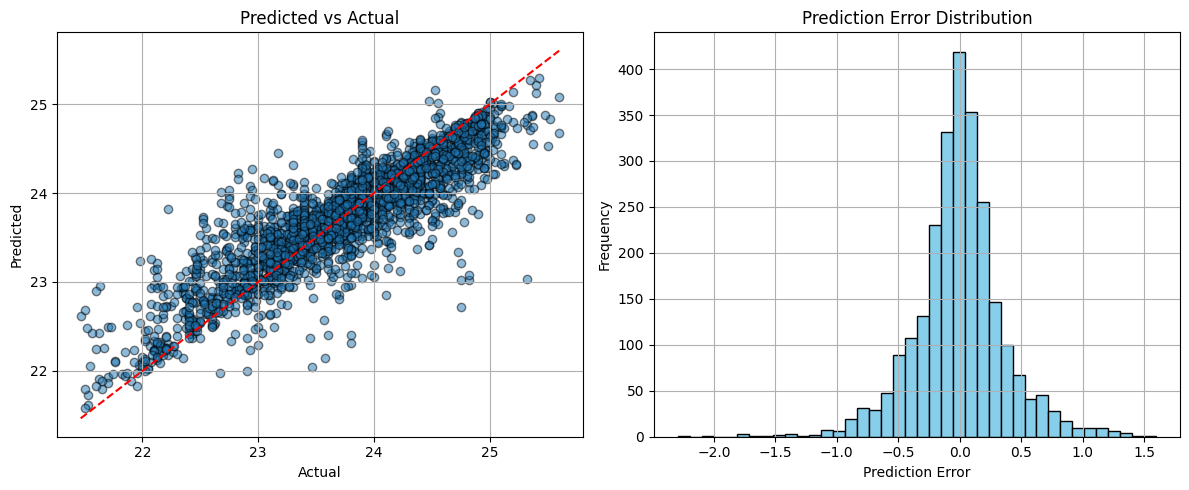

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np

# Feature matrix and target
X = df.drop(columns=["tr_3"])
y = df["tr_3"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define hyperparameter grid
param_dist = {
    "n_estimators": [200, 300, 400],
    "max_depth": [8, 10, 12],
    "learning_rate": [0.03, 0.05, 0.1, 0.2, 0.3],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.4, 0.6, 0.8, 1],
    "gamma": [0, 0.1],
}

# Randomized search setup
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit with randomized search
random_search.fit(X_train, y_train)

# Best model
xgb_model = random_search.best_estimator_

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {random_search.best_params_}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# Plot: Predictions vs Actual and Error Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot
ax1.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax1.set_xlabel("Actual")
ax1.set_ylabel("Predicted")
ax1.set_title("Predicted vs Actual")
ax1.grid(True)

# Error distribution
errors = y_pred - y_test
ax2.hist(errors, bins=40, color="skyblue", edgecolor="black")
ax2.set_title("Prediction Error Distribution")
ax2.set_xlabel("Prediction Error")
ax2.set_ylabel("Frequency")
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
output_path = os.path.join(output_dir, "xgb_model.pkl")

# Save the model
with open(output_path, "wb") as f:
    pickle.dump(xgb_model, f)

On average, the model's predictions deviate from the actual room temperature by approximately 0.26°C. This is a very small error in practical terms, considering the typical range of indoor temperatures (20-25°C). From a thermal comfort perspective, deviations below 0.5°C are often imperceptible to occupants, suggesting the model performs at a high level of precision.

An R² value implies that approximately 76% of the variance in room temperature is explained by the model. This indicates a strong fit. The remaining 24% of unexplained variance most likely can be attributed to unobserved variables, such as window opening, occupancy, or internal heat gains (namely, from appliances or people).

Feature importance scores derived from the trained XGBoost model were used to interpret the contribution of each input feature.

The 6th and 5th hour lags of ambient temperature were found as the most influential features in the model. This indicates that outdoor temperature several hours earlier has the strongest impact on current indoor thermal conditions, likely due to the thermal inertia of the building structure. Later lags of deltae (especially deltae_lag_6) are among the top contributors, indicating the delayed effect of heating energy delivery on room temperature.

Features hour_of_day, is_working_day and day_of_week rank high, showing that operator and consumer behavior patterns strongly affect room temperature (namely, occupancy, heating schedules).

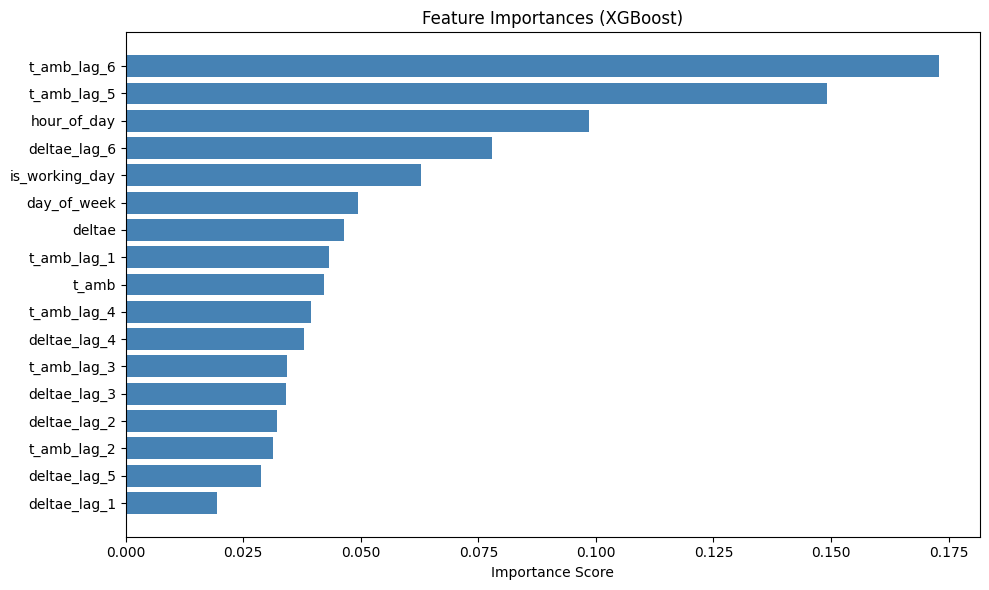

In [ ]:
# Get feature importances
importances = model.feature_importances_

# Create DataFrame for sorting and visualization
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='steelblue')
plt.gca().invert_yaxis()  # Most important at the top
plt.title("Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


## 4.3 Control

Opening pickled models and scaler for sequence forecasting.

In [ ]:
output_dir = "/content/drive/MyDrive/Projects/FondZaNauku/Prizma/Research/Initial forecasting model/notebooks/models"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "transformer_model.pkl")
with open(output_path, "rb") as f:
    model = pickle.load(f)

scaler_path = os.path.join(output_dir, "transformer_scaler.pkl")
with open(scaler_path, "rb") as f:
    scaler = pickle.load(f)

xgb_path = os.path.join(output_dir, "xgb_model.pkl")
with open(xgb_path, "rb") as f:
    xgb_model = pickle.load(f)

In [ ]:
# Copy original DataFrame
df_lagged = dftamb.copy()

# Generate lagged features for deltae and t_amb
for lag in range(1, 7):
    df_lagged[f"deltae_lag_{lag}"] = df_lagged["deltae"].shift(lag)
    df_lagged[f"t_amb_lag_{lag}"] = df_lagged["t_amb"].shift(lag)

# Drop rows with NaNs introduced by shifting
df_lagged = df_lagged.dropna()

# Resulting df_lagged has 17 columns
print(df_lagged.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38668 entries, 2019-11-03 01:00:00 to 2024-04-01 05:00:00
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t_amb           38668 non-null  float64
 1   deltae          38668 non-null  float64
 2   hour_of_day     38668 non-null  int32  
 3   day_of_week     38668 non-null  int32  
 4   is_working_day  38668 non-null  int64  
 5   deltae_lag_1    38668 non-null  float64
 6   t_amb_lag_1     38668 non-null  float64
 7   deltae_lag_2    38668 non-null  float64
 8   t_amb_lag_2     38668 non-null  float64
 9   deltae_lag_3    38668 non-null  float64
 10  t_amb_lag_3     38668 non-null  float64
 11  deltae_lag_4    38668 non-null  float64
 12  t_amb_lag_4     38668 non-null  float64
 13  deltae_lag_5    38668 non-null  float64
 14  t_amb_lag_5     38668 non-null  float64
 15  deltae_lag_6    38668 non-null  float64
 16  t_amb_lag_6     38668 non-null  float64
d

In [ ]:
input_var_names

['temp',
 'feelslike',
 'humidity',
 'snowdepth',
 'sealevelpressure',
 'solarradiation',
 'hour_of_day',
 'heating_on',
 'deltae_lag_1',
 'deltae_lag_2',
 'deltae_lag_3',
 'deltae_lag_4',
 'deltae_lag_5',
 'deltae_lag_6',
 'deltae_lag_7',
 'deltae_lag_8',
 'deltae_lag_9',
 'deltae_lag_10',
 'deltae_lag_11',
 'deltae_lag_12',
 'deltae_lag_13',
 'deltae_lag_14',
 'deltae_lag_15',
 'deltae_lag_16',
 'deltae_lag_17',
 'deltae_lag_18',
 'deltae_lag_19',
 'deltae_lag_20',
 'deltae_lag_21',
 'deltae_lag_22',
 'deltae_lag_23',
 'deltae_lag_24',
 'temp_next_1',
 'temp_next_2',
 'temp_next_3',
 'temp_next_4',
 'temp_next_5',
 'temp_next_6',
 'temp_next_7',
 'temp_next_8',
 'temp_next_9',
 'temp_next_10',
 'temp_next_11',
 'temp_next_12',
 'temp_next_13',
 'temp_next_14',
 'temp_next_15',
 'temp_next_16',
 'temp_next_17',
 'temp_next_18',
 'temp_next_19',
 'temp_next_20',
 'temp_next_21',
 'temp_next_22',
 'temp_next_23',
 'temp_next_24']

In [ ]:
# Extract actual values and inputs from test_loader
actuals_list = []
inputs_list = []

for x_batch, y_batch in test_loader:
    actuals_list.append(y_batch.numpy())
    inputs_list.append(x_batch.numpy())

actuals_array = np.concatenate(actuals_list, axis=0)  # shape [samples, 24]
inputs_array = np.concatenate(inputs_list, axis=0)    # shape [samples, N, features]

# Generate forecasts
model.eval()
forecast_list = []

with torch.no_grad():
    for x_batch, _ in test_loader:
        preds = model(x_batch.to(model.device))  # [batch, 24, 1]
        preds = preds.squeeze(-1).cpu().numpy()
        forecast_list.append(preds)

forecast_matrix = np.concatenate(forecast_list, axis=0)
assert forecast_matrix.shape == actuals_array.shape

# Use feature names and timestamps
input_var_names = list(features.columns)
timestamps = test_features.index
df_lagged = df_lagged[~df_lagged.index.duplicated(keep='first')]
xgb_input_features = df_lagged.columns.tolist()

# Predict room temp
predicted_room_temp_matrix = []

for i, ts in enumerate(timestamps[:len(forecast_matrix)]):
    y_pred = forecast_matrix[i]  # predicted deltae for 24h
    tr_preds = []

    # Extract corresponding input snapshot for temp_next values
    input_snapshot = inputs_array[i, -1, :]
    input_snapshot_descaled = descale_input_snapshot(input_snapshot, scaler)

    temp_next_values = []
    for h in range(1, 25):
        fname = f"temp_next_{h}"
        if fname in input_var_names:
            idx = input_var_names.index(fname)
            temp_next_values.append(input_snapshot_descaled[idx])
        else:
            temp_next_values.append(np.nan)

    if ts not in df_lagged.index:
        predicted_room_temp_matrix.append([np.nan]*24)
        continue

    row = df_lagged.loc[ts]
    if isinstance(row, pd.DataFrame):
        row = row.iloc[0]

    # Init lag buffers
    lagged_deltae = [row[f'deltae_lag_{k}'] for k in range(1, 7)]
    lagged_t_amb = [row[f't_amb_lag_{k}'] for k in range(1, 7)]

    for h in range(24):
        t_h = ts + pd.Timedelta(hours=h + 1)

        # Use forecasted temp for lag update if h >= 6
        if h < 6:
            t_amb_val = row.get('t_amb', np.nan)
        else:
            t_amb_val = temp_next_values[h] if h < len(temp_next_values) else np.nan

        features_dict = {
            'hour_of_day': t_h.hour,
            'day_of_week': t_h.weekday(),
            'is_working_day': int(t_h.weekday() < 5),
            't_amb': t_amb_val,
            'deltae': y_pred[h],
        }

        for k in range(6):
            features_dict[f'deltae_lag_{k+1}'] = lagged_deltae[k]
            features_dict[f't_amb_lag_{k+1}'] = lagged_t_amb[k]

        input_vector = np.array([features_dict.get(f, 0.0) for f in xgb_input_features]).reshape(1, -1)
        tr_pred = xgb_model.predict(input_vector)[0]
        tr_preds.append(tr_pred)

        # Update lags
        lagged_deltae = [y_pred[h]] + lagged_deltae[:-1]
        lagged_t_amb = [t_amb_val] + lagged_t_amb[:-1]

    predicted_room_temp_matrix.append(tr_preds)

predicted_room_temp_matrix = np.array(predicted_room_temp_matrix)
room_temp_min = np.nanmin(predicted_room_temp_matrix)
room_temp_max = np.nanmax(predicted_room_temp_matrix)


In [ ]:
# Room temperature range widgets
min_temp_widget = widgets.FloatText(value=21.0, description='Min Room Temp:', step=0.1)
max_temp_widget = widgets.FloatText(value=24.0, description='Max Room Temp:', step=0.1)

# UI layout
index_tracker = {"start_index": 5000}
step = 1

output_info = widgets.Output(layout={'border': '0px solid gray', 'width': '30%'})
output_plot = widgets.Output(layout={'border': '0px solid gray', 'width': '66%'})
hbox = widgets.HBox([output_info, output_plot])

button_back = widgets.Button(description="⏪ Back")
button_next = widgets.Button(description="Next ⏩")
index_input = widgets.BoundedIntText(value=5000, min=0, max=len(actuals_array)-1, description="Go to:")
go_button = widgets.Button(description="Go", layout=widgets.Layout(width='50px'))

# Plotting range
room_temp_min_global = np.nanmin(predicted_room_temp_matrix)
room_temp_max_global = np.nanmax(predicted_room_temp_matrix)

def update_plot(i):
    output_info.clear_output(wait=True)
    output_plot.clear_output(wait=True)

    y_true = actuals_array[i]
    y_pred = forecast_matrix[i]
    x_range = np.arange(1, 25)

    scaled_input_snapshot = inputs_array[i, -1, :]
    descaled_input_snapshot = descale_input_snapshot(scaled_input_snapshot, scaler)

    timestamp = timestamps[i]
    dt_str = timestamp.strftime("%Y-%m-%d %H:%M")
    weekday = timestamp.strftime("%A")

    min_room_temp = min_temp_widget.value
    max_room_temp = max_temp_widget.value

    with output_info:
        print(f"📅 Date & Time: {dt_str} ({weekday})")
        print("\n🔢 Input Features (PREVIOUS HOUR):")
        for name, value in zip(input_var_names, descaled_input_snapshot):
            if name.startswith("deltae_lag") or name.startswith("temp_next"):
                continue
            print(f"  {name}: {value:.2f}")

    # Forecasted temps
    temp_forecast_vals = []
    for h in range(1, 25):
        fname = f"temp_next_{h}"
        if fname in input_var_names:
            idx = input_var_names.index(fname)
            temp_forecast_vals.append(descaled_input_snapshot[idx])
        else:
            temp_forecast_vals.append(np.nan)

    # Actual future ambient temps
    actual_ambient_vals = []
    for h in range(1, 25):
        t_h = timestamp + pd.Timedelta(hours=h)
        actual_ambient_vals.append(dftamb.loc[t_h, "t_amb"] if t_h in dftamb.index else np.nan)

    tr_preds = predicted_room_temp_matrix[i]

    with output_plot:
        fig, ax1 = plt.subplots(figsize=(10, 4))
        ax1.plot(x_range, y_true, label='Actual Δe', color='gray', linestyle='--', alpha=0.6)
        ax1.plot(x_range, y_pred, label='Forecast Δe', color='black')
        for j, val in enumerate(y_pred):
            ax1.text(x_range[j], val, f"{val:.1f}", ha='center', va='bottom', fontsize=8)
        ax1.set_xlabel("Hour Ahead")
        ax1.set_ylabel("Δe [kWh]")
        ax1.grid(True)
        ax1.legend(loc="upper left")

        ax2 = ax1.twinx()
        ax2.plot(x_range, temp_forecast_vals, label='Forecast Temp', color='red')
        ax2.plot(x_range, actual_ambient_vals, label='Actual T_amb', color='red', linestyle='--', alpha=0.3)
        ax2.set_ylabel("Temperature Forecast [°C]", color='red')
        ax2.tick_params(axis='y', labelcolor='red')
        ax2.legend(loc="upper right")

        ax3 = ax1.twinx()
        ax3.spines["right"].set_position(("axes", 1.1))
        ax3.plot(x_range, tr_preds, label='Predicted Room Temp', color='green')
        ax3.set_ylim(room_temp_min_global - 1, room_temp_max_global + 1)
        ax3.set_ylabel("Room Temp [°C]", color='green')
        ax3.tick_params(axis='y', labelcolor='green')
        ax3.legend(loc="center right")

        # Highlight overheat and underheat regions
        for j, val in enumerate(tr_preds):
            if val > max_room_temp:
                ax3.axvspan(x_range[j] - 0.5, x_range[j] + 0.5, color='red', alpha=0.15)
            elif val < min_room_temp:
                ax3.axvspan(x_range[j] - 0.5, x_range[j] + 0.5, color='blue', alpha=0.15)

        ax1.set_title(f"Forecast vs Actual Δe and Temperature Forecast (Instance {i})")
        fig.tight_layout()
        plt.show()

# Navigation callbacks
def on_back_clicked(b):
    index_tracker["start_index"] = max(0, index_tracker["start_index"] - step)
    index_input.value = index_tracker["start_index"]
    update_plot(index_tracker["start_index"])

def on_next_clicked(b):
    index_tracker["start_index"] = min(len(actuals_array) - 1, index_tracker["start_index"] + step)
    index_input.value = index_tracker["start_index"]
    update_plot(index_tracker["start_index"])

def on_go_clicked(b):
    val = index_input.value
    if isinstance(val, int):
        index_tracker["start_index"] = val
        update_plot(val)

button_back.on_click(on_back_clicked)
button_next.on_click(on_next_clicked)
go_button.on_click(on_go_clicked)

# Display UI
display(widgets.HBox([button_back, button_next, index_input, go_button]))
display(widgets.HBox([min_temp_widget, max_temp_widget]))
display(hbox)
update_plot(index_tracker["start_index"])


# 5 Conclusions

It introduces a layered modeling structure that separates the forecasting of system-level variables from occupant-level response, enabling the use of heterogeneous datasets.

It constructs a surrogate model for thermal comfort, enabling indirect feedback-based control optimization without full instrumentation of the building stock.

It formulates control as an optimization problem over forecasted trajectories, providing a more principled basis for decision-making.

This approach enables scalable, demand-aware control strategies for DHS where only partial feedback is available from the consumption side, aligning with the vision of intelligent, occupant-centric thermal energy systems.


# 6 Literature

- Ali, A., Jayaraman, R., Mayyas, A., Alaifan, B., & Azar, E. (2023). Machine learning as a surrogate to building performance simulation: Predicting energy consumption under different operational settings. Energy and Buildings, 286, 112940. https://doi.org/10.1016/j.enbuild.2023.112940
- Clausen, A., Arendt, K., Johansen, A., Sangogboye, F. C., Kjærgaard, M. B., Veje, C. T., & Jørgensen, B. N. (2021). A digital twin framework for improving energy efficiency and occupant comfort in public and commercial buildings. Energy Informatics, 4(S2), 40. https://doi.org/10.1186/s42162-021-00153-9
- Drgoňa, J., Arroyo, J., Cupeiro Figueroa, I., Blum, D., Arendt, K., Kim, D., Ollé, E. P., Oravec, J., Wetter, M., Vrabie, D. L., & Helsen, L. (2020). All you need to know about model predictive control for buildings. Annual Reviews in Control, 50, 190–232. https://doi.org/10.1016/j.arcontrol.2020.09.001
- Elmaz, F., Eyckerman, R., Casteels, W., Latré, S., & Hellinckx, P. (2021). CNN-LSTM architecture for predictive indoor temperature modeling. Building and Environment, 206, 108327. https://doi.org/10.1016/j.buildenv.2021.108327
- Killian, M., & Kozek, M. (2016). Ten questions concerning model predictive control for energy efficient buildings. Building and Environment, 105, 403–412. https://doi.org/10.1016/j.buildenv.2016.05.034
- Kingma, D. P., & Ba, J. (2017). Adam: A Method for Stochastic Optimization (arXiv:1412.6980). arXiv. https://doi.org/10.48550/arXiv.1412.6980
- Kudela, L., Chýlek, R., & Pospíšil, J. (2020). Efficient Integration of Machine Learning into District Heating Predictive Models. Energies, 13(23), 6381. https://doi.org/10.3390/en13236381
- Liang, Y., Pan, Y., Yuan, X., Jia, W., & Huang, Z. (2023). Surrogate modeling for long-term and high-resolution prediction of building thermal load with a metric-optimized KNN algorithm. Energy and Built Environment, 4(6), 709–724. https://doi.org/10.1016/j.enbenv.2022.06.008
- Lumbreras, M., Garay-Martinez, R., Arregi, B., Martin-Escudero, K., Diarce, G., Raud, M., & Hagu, I. (2022). Data driven model for heat load prediction in buildings connected to District Heating by using smart heat meters. Energy, 239, 122318. https://doi.org/10.1016/j.energy.2021.122318
- Mostafavi, S., Song, C., Sharma, A., Goyal, R., & Brito, A. (2023, September 4). Benchmarking Model Predictive Control Algorithms in Building Optimization Testing Framework (BOPTEST). https://doi.org/10.26868/25222708.2023.1371
- Mtibaa, F., Nguyen, K.-K., Azam, M., Papachristou, A., Venne, J.-S., & Cheriet, M. (2020). LSTM-based indoor air temperature prediction framework for HVAC systems in smart buildings. Neural Computing and Applications, 32(23), 17569–17585. https://doi.org/10.1007/s00521-020-04926-3
- Popel, M., & Bojar, O. (2018). Training Tips for the Transformer Model. The Prague Bulletin of Mathematical Linguistics, 110(1), 43–70. https://doi.org/10.2478/pralin-2018-0002
- Shakhovska, N., Mochurad, L., Caro, R., & Argyroudis, S. (2025). Innovative machine learning approaches for indoor air temperature forecasting in smart infrastructure. Scientific Reports, 15(1), 47. https://doi.org/10.1038/s41598-024-85026-3
- Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, L., & Polosukhin, I. (2023). Attention Is All You Need (arXiv:1706.03762). arXiv. https://doi.org/10.48550/arXiv.1706.03762
- Veerababu, D., Raikar, A. A., & Ghosh, P. K. (2025). Improving Neural Network Training using Dynamic Learning Rate Schedule for PINNs and Image Classification. Machine Learning with Applications, 21, 100697. https://doi.org/10.1016/j.mlwa.2025.100697
- Zdravković, M., Ćirić, I., & Ignjatović., M. (2021). Towards explainable AI-assisted operations in District Heating Systems. IFAC-PapersOnLine, 54(1), 390–395. https://doi.org/10.1016/j.ifacol.2021.08.044
- Zerveas, G., Jayaraman, S., Patel, D., Bhamidipaty, A., & Eickhoff, C. (2020). A Transformer-based Framework for Multivariate Time Series Representation Learning (arXiv:2010.02803). arXiv. https://doi.org/10.48550/arXiv.2010.02803
